In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

In [145]:
ccr_ground = pd.read_csv("data/ccr_hourly_data.csv")
jla_ground = pd.read_csv("data/jla_hourly_data.csv")
tsz_ground = pd.read_csv("data/tsz_hourly_data.csv")
nrv_ground = pd.read_csv("data/nrv_hourly_data.csv")

In [146]:
ccr_pred = pd.read_csv("../../02_program_code/timesteps_output_POFR_CCR-COL_DBG.csv").iloc[:-1]
# ccr_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_CCR-COL_DBG.csv").iloc[:-1]
jla_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_JLA-JAK_DBG.csv").iloc[:-1]
tsz_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_TSZ-SAN_DBG.csv").iloc[:-1]
nrv_pred = pd.read_csv("../../02_program_code/pf_nogs/timesteps_output_POFR_NRV-NEW_DBG.csv").iloc[:-1]

In [147]:
ccr_ground.columns

Index(['year', 'julian-day', 'standard-time', 'solar', 'rain', 'wind', 'T-air',
       'T-soil', 'D-MD', 'GW', 'E-MD', 'P-PD', 'P-MD', 'K-plant'],
      dtype='object')

In [148]:
ccr_pred.columns

Index(['year', 'julian-day', 'standard-time', 'solar', 'rain', 'wind', 'T-air',
       'T-soil', 'D-MD', 'P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P-PD', 'P-MD',
       'E-MD', 'GW', 'leaf-air-vpd', 'leaftemp', 'Anet-la', 'ci', 'PPFD',
       'S-P-MD', 'S-E-MD', 'S-GW', 'S-leaf-air-vpd', 'S-leaftempt',
       'S-Anet-la', 'S-ci', 'S-PPFD', 'S-E-tree', 'Anet-tree', 'Pcrit',
       'Ecrit', 'P-leaf', 'P-stem', 'P-root', 'K-stem', 'K-leaf', 'K-plant',
       'K-xylem', 'K-root-1', 'K-root-2', 'K-root-3', 'K-root-4', 'K-root-5',
       'K-root-all', 'E-root-1', 'E-root-2', 'E-root-3', 'E-root-4',
       'E-root-5', 'water-content', 'water-content-delta', 'end-rain',
       'end-ground-water', 'end-E', 'end-drainage', 'end-soil-evap', 'end-ET',
       'end-Anet-la', 'end-total-water-input', 'end-PLC-plant',
       'end-PLC-xylem', 'end-runoff'],
      dtype='object')

In [149]:
def cmp_pred_to_ground_metrics(columns, ground, pred, start, end):

    fit = {}

    for col in columns:

        col_ground = ground[ground['julian-day'].between(start, end)][col].dropna()
        col_pred = pred[col]

        col_pred = col_pred.loc[col_ground.index]
        
        mse = mean_squared_error(col_ground, col_pred)
        rmse = root_mean_squared_error(col_ground, col_pred)
        mape = mean_absolute_percentage_error(col_ground, col_pred)
        r2 = r2_score(col_ground, col_pred)

        fit[col] = {
            'mse' : mse,
            'rmse' : rmse,
            'mape' : mape,
            'r2' : r2
        }

        # Plot ground vs pred with fitted line and 1:1 correspondence
        plt.figure(figsize=(8, 6))
        plt.scatter(col_ground, col_pred, label='Data Points', alpha=0.7)
        plt.plot([col_ground.min(), col_ground.max()], [col_ground.min(), col_ground.max()], 'r--', label='1:1 Line')
        
        # Fit a line to the data
        fit_coeff = np.polyfit(col_ground, col_pred, 1)
        fit_line = np.poly1d(fit_coeff)
        plt.plot(col_ground, fit_line(col_ground), 'b-', label=f'Fitted Line: y={fit_coeff[0]:.2f}x+{fit_coeff[1]:.2f}')
        
        # Add metrics as text
        plt.text(0.05, 0.95, ''.join([f'{key}: {value:.2f}\n' for key, value in fit[col].items()]), 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
        
        plt.xlabel('Ground')
        plt.ylabel('Prediction')
        plt.title(f'Ground vs Prediction: {col}')
        plt.legend()
        plt.grid(True)
        plt.show()

    return fit

In [160]:
columns = ['P-PD', 'P-MD', 'GW', 'K-plant', 'E-MD']
predrought_cutoff = 236
start_day = 201
drought = 240

In [164]:
start_timestep = ccr_pred[ccr_pred['julian-day'] == start_day].index[0]
predrought_timestep = ccr_pred[ccr_pred['julian-day'] == predrought_cutoff].index[0]
drought_timestep = ccr_pred[ccr_pred['julian-day'] == drought].index[0]

print(f"Start Timestep: {start_timestep}, Predrought Timestep: {predrought_timestep}, Drought Timestep: {drought_timestep}")

Start Timestep: 0, Predrought Timestep: 840, Drought Timestep: 936


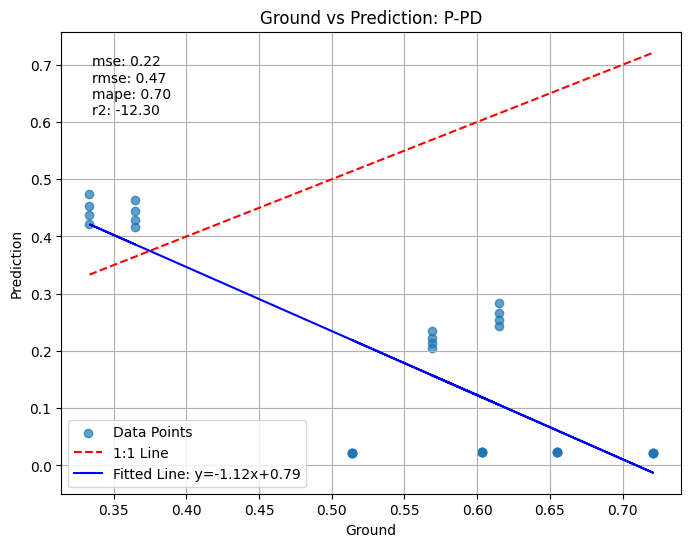

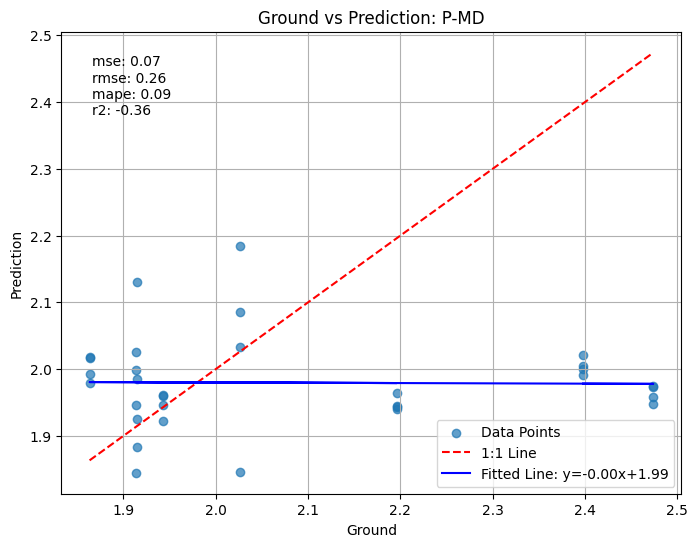

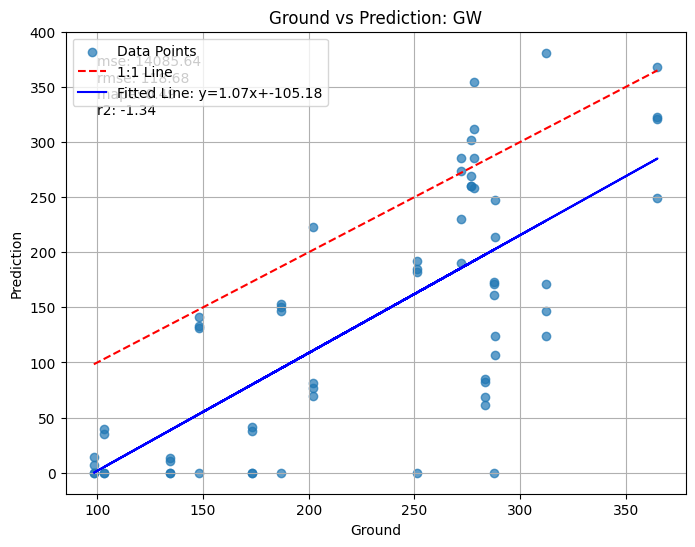

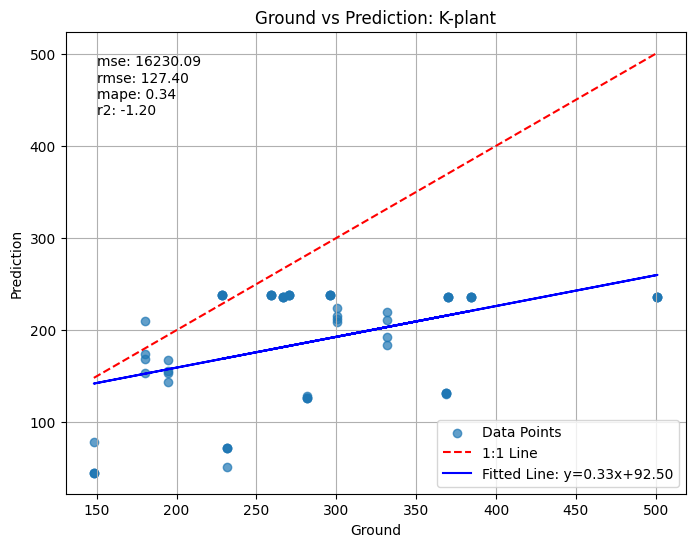

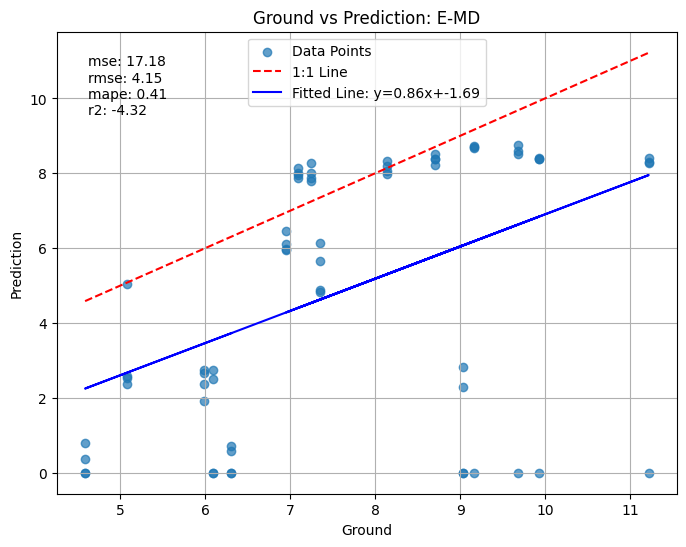

{'P-PD': {'mse': 0.2165413228545142,
  'rmse': 0.46534000779485335,
  'mape': 0.6981747994803282,
  'r2': -12.295946936011635},
 'P-MD': {'mse': 0.06656228094648065,
  'rmse': 0.2579966684794217,
  'mape': 0.08713561263941394,
  'r2': -0.3560961891762351},
 'GW': {'mse': 14085.64276030622,
  'rmse': 118.68295058813722,
  'mape': 0.4910245646470652,
  'r2': -1.3405645261235186},
 'K-plant': {'mse': 16230.087959876424,
  'rmse': 127.39736245258935,
  'mape': 0.33508019163613045,
  'r2': -1.1953752762831886},
 'E-MD': {'mse': 17.184002189502845,
  'rmse': 4.145359114660978,
  'mape': 0.4131166274976891,
  'r2': -4.316236154176319}}

In [152]:
display(cmp_pred_to_ground_metrics(columns, ccr_ground, ccr_pred, start_day, predrought_cutoff))

In [153]:
start=0
stop=len(ccr_ground)

In [154]:
ccr_ground_pre_and_drought = ccr_ground
ccr_pred_pre_and_drought = ccr_pred

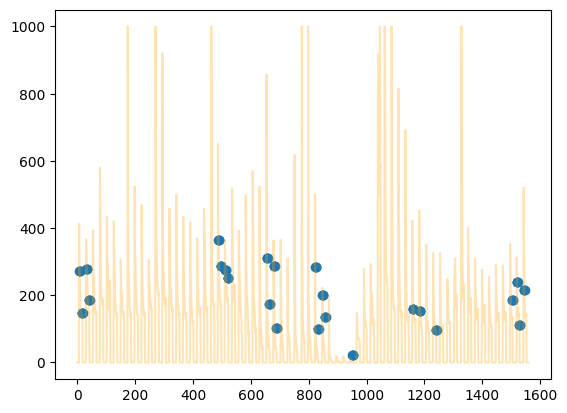

In [165]:
plt.scatter(range(start, stop), ccr_ground_pre_and_drought['GW'])
plt.plot(range(start, stop), np.clip(ccr_pred_pre_and_drought['GW'], 0, 1000), color="orange", alpha=0.3)

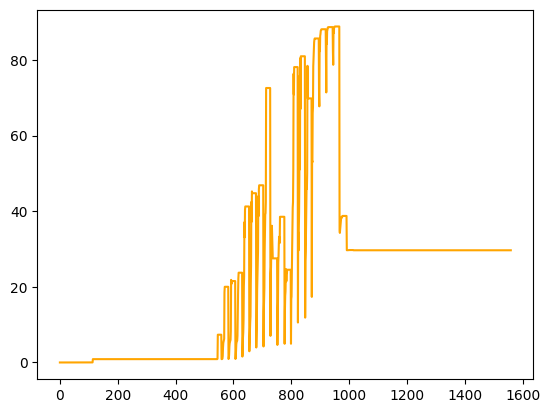

In [156]:
plt.plot(range(start, stop), ccr_pred_pre_and_drought['end-PLC-plant'], color="orange")

In [157]:
ccr_ground['P-PD'].describe()

count    60.000000
mean      0.527929
std       0.126601
min       0.322222
25%       0.442000
50%       0.514000
75%       0.621667
max       0.721333
Name: P-PD, dtype: float64

In [158]:
ccr_ground['P-MD'].describe()


count    60.000000
mean      2.068237
std       0.206822
min       1.725556
25%       1.913333
50%       2.026667
75%       2.220667
max       2.474000
Name: P-MD, dtype: float64

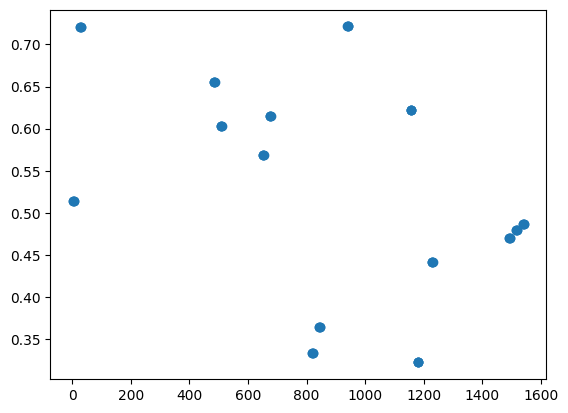

In [159]:
plt.plot(range(len(ccr_ground['P-PD'])), ccr_ground['P-PD'], marker='o', linestyle='-')